In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("europe-motorbikes.csv")

In [4]:
df.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [6]:
df.shape

(34917, 10)

In [7]:
pd.set_option("display.float_format","{:.2f}".format)

In [8]:
df.describe()

,price,mileage,power
count,34917.00,34917.00,28598.00
mean,45685.32,21831.75,206.16
std,4850120.19,205942.09,9371.43
min,1.00,0.00,1.00
25%,6999.00,2932.00,50.00
50%,9920.00,11000.00,90.00
75%,12590.00,25000.00,125.00
max,888888888.00,9999999.00,913595.00


In [ ]:
#find null variables
df.isnull().sum()
#we don't drop missing values because if we do that we can delete important values

price             0
mileage           0
power          6319
make_model        0
date              0
fuel           3190
gear          22070
offer_type        0
version       17504
link              0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(5832)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

EDA

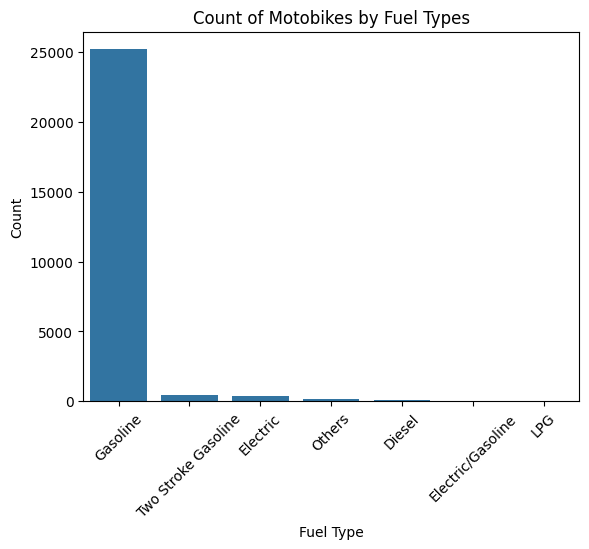

In [13]:
sns.countplot(x="fuel", data = df)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Count of Motobikes by Fuel Types")
plt.xticks(rotation=45)
plt.show()

In [15]:
gear_power= df.groupby("gear")["power"].mean()
gear_power

gear
Automatic         80.23
Manual           103.79
Semi-automatic   126.93
Name: power, dtype: float64

In [18]:
df.sort_values(by="price",ascending=False, inplace=True)

In [19]:
df

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
23654,888888888,1196,10.00,SYM SYMNH X,08/2019,Gasoline,Manual,Used,!!! VENDUE !!! indisponible,/offers/sym-symnh-x-vendue-indisponible-gasoli...
6857,123456789,24,175.00,EBR RS,11/2011,Gasoline,Manual,Used,EBR 1190 RS Nieuw !,/offers/ebr-rs-ebr-1190-rs-nieuw-gasoline-blac...
20925,123456789,24000,101.00,Buell XB 12,06/2009,Gasoline,Manual,Used,NaN,/offers/buell-xb-12-gasoline-red-6bd3eec5-449d...
32668,9999999,9999999,12.00,Kawasaki 400 S3,04/2019,Gasoline,NaN,Used,NaN,/offers/kawasaki-400-s3-gasoline-green-0ff295c...
12571,9999999,9999999,135.00,BMW C 400 GT,01/2021,LPG,NaN,Used,NaN,/offers/bmw-c-400-gt-lpg-green-a8ba900e-ea46-4...
...,...,...,...,...,...,...,...,...,...,...
4285,50,1000,8.00,Husaberg FE 550,11/2006,Gasoline,NaN,Used,Force,/offers/husaberg-fe-550-force-gasoline-blue-ec...
34899,50,390,1.00,Kymco Like 50,06/2011,Gasoline,NaN,Used,NaN,/offers/kymco-like-50-gasoline-white-70b79c85-...
19000,50,40000,19.00,Aprilia Sportcity 200,05/2006,Gasoline,Automatic,Used,NaN,/offers/aprilia-sportcity-200-gasoline-black-9...
15003,2,23000,14.00,Dnepr MT 10,09/1984,Gasoline,Manual,Antique / Classic,36 Sidecar,/offers/dnepr-mt-10-36-sidecar-gasoline-black-...


In [20]:
offer_counts =df["offer_type"].value_counts()
offer_counts

offer_type
Used                 26263
New                   1730
Demonstration          680
Pre-registered         239
Antique / Classic      173
Name: count, dtype: int64

In [21]:
make_model_counts = df["make_model"].value_counts()
make_model_counts

make_model
BMW R 1200 GS              678
BMW R nineT                377
Others                     336
Harley-Davidson Softail    328
Honda                      323
                          ... 
Honda RC 213                 1
MV Agusta 750 S              1
Suzuki GN 250                1
Cagiva                       1
IO 1500 GT                   1
Name: count, Length: 2168, dtype: int64

In [23]:
fuel_avg_price = df.groupby("fuel")["price"].mean()
fuel_avg_price

fuel
Diesel                 163621.05
Electric                 6202.65
Electric/Gasoline        6037.38
Gasoline                57857.77
LPG                   5003124.50
Others                   9453.84
Two Stroke Gasoline      3713.34
Name: price, dtype: float64